# Análisis Exploratorio de Datos (EDA) - Sostenibilidad Pesquera

## FASE B: Integración de Datos Reales

Este notebook realiza un análisis exploratorio completo de datos de pesquerías para el proyecto de Redes Bayesianas y Deep Learning aplicados a la sostenibilidad pesquera.

### Fuentes de Datos
- **Our World in Data**: https://ourworldindata.org/fish-and-overfishing
- **FAO FishStatJ**: https://www.fao.org/fishery/statistics/software/fishstatj/en
- **Global Fishing Watch**: https://globalfishingwatch.org/datasets-and-code/

### Contenido
1. Carga de datos
2. Estadísticas descriptivas
3. Análisis de distribuciones
4. Análisis de correlaciones
5. Análisis temporal
6. Análisis geográfico
7. Variables de sostenibilidad
8. Preparación para redes bayesianas

## 1. Importación de Librerías y Configuración

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Agregar directorio padre al path para importar módulos locales
import sys
sys.path.insert(0, str(Path.cwd().parent))

# Importar módulo de datos local
from data.loaders import (
    generate_synthetic_fisheries_data,
    prepare_bayesian_dataset,
    discretize_for_bayesian,
    print_data_info,
    load_or_generate_data,
    PROCESSED_DIR
)

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


## 2. Carga de Datos

In [3]:
# Generar dataset sintético realista basado en distribuciones de FAO
# En producción, aquí se cargarían datos reales de FAO/OWID

df = generate_synthetic_fisheries_data(
    n_samples=1000,
    years=(2010, 2023),
    random_state=42
)

# Guardar datos procesados
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)
df.to_csv(PROCESSED_DIR / 'fisheries_data.csv', index=False)

print(f"Dataset generado: {len(df)} registros")
print(f"Guardado en: {PROCESSED_DIR / 'fisheries_data.csv'}")

Dataset generado: 1000 registros
Guardado en: c:\Proyectos\Pesquerias\DL_Bayesian\data\processed\fisheries_data.csv


In [4]:
# Vista general del dataset
print_data_info(df)
df.head(10)

INFORMACIÓN DEL DATASET
Registros: 1000
Columnas: 18

Columnas disponibles:
  - Country: str (nulls: 0)
  - Year: int64 (nulls: 0)
  - SST_C: float64 (nulls: 0)
  - Salinity_ppt: float64 (nulls: 0)
  - Chlorophyll_mg_m3: float64 (nulls: 0)
  - pH: float64 (nulls: 0)
  - Fleet_Size: int64 (nulls: 0)
  - Fishing_Effort_hours: float64 (nulls: 0)
  - Fuel_Consumption_L: float64 (nulls: 0)
  - Fish_Price_USD_ton: float64 (nulls: 0)
  - Fuel_Price_USD_L: float64 (nulls: 0)
  - Operating_Cost_USD: float64 (nulls: 0)
  - Capture_Production_Mt: float64 (nulls: 0)
  - Aquaculture_Production_Mt: float64 (nulls: 0)
  - Total_Production_Mt: float64 (nulls: 0)
  - CPUE: float64 (nulls: 0)
  - Sustainability_Score: float64 (nulls: 0)
  - Sustainable: int64 (nulls: 0)

Distribución de Sostenibilidad:
Sustainable
1    874
0    126
Name: count, dtype: int64


,Country,Year,SST_C,Salinity_ppt,Chlorophyll_mg_m3,pH,Fleet_Size,Fishing_Effort_hours,Fuel_Consumption_L,Fish_Price_USD_ton,Fuel_Price_USD_L,Operating_Cost_USD,Capture_Production_Mt,Aquaculture_Production_Mt,Total_Production_Mt,CPUE,Sustainability_Score,Sustainable
0,USA,2013,25.24,38.05,0.791,8.05,31850,47450.0,513571.0,820.21,1.04,573944.0,3.282,4.038,7.321,0.0692,0.607,1
1,Spain,2020,17.38,34.14,0.476,7.96,120,11737.0,358801.0,1478.61,1.04,424182.0,1.694,1.815,3.508,0.1443,0.531,1
2,USA,2011,19.00,34.42,0.548,8.47,2921,7649.0,87008.0,977.77,1.32,139270.0,2.772,3.838,6.610,0.3624,0.696,1
3,Iceland,2019,27.46,36.40,0.842,7.92,17728,48317.0,2340792.0,4138.15,1.34,3204429.0,1.568,2.236,3.804,0.0324,0.529,1
4,South Korea,2018,12.62,32.27,1.889,7.92,6087,81118.0,3816771.0,1527.13,1.27,4902854.0,0.655,1.296,1.952,0.0081,0.463,0
5,Peru,2012,27.82,35.92,0.186,8.17,2639,35165.0,683578.0,1584.56,1.02,750857.0,3.278,3.930,7.208,0.0932,0.482,0
6,USA,2010,26.52,35.04,0.586,7.80,912,46338.0,606060.0,731.98,1.05,704352.0,2.804,2.289,5.092,0.0605,0.497,0
7,Norway,2019,23.64,36.45,0.774,8.27,416,9225.0,289336.0,851.23,1.78,562973.0,0.694,0.759,1.453,0.0753,0.684,1
8,Chile,2013,21.91,31.65,0.342,7.90,3475,14291.0,430264.0,996.07,1.29,604546.0,2.484,2.572,5.057,0.1738,0.602,1
9,Vietnam,2016,16.16,36.58,0.403,8.38,364,39611.0,539166.0,3278.78,1.05,635650.0,4.478,4.615,9.093,0.1130,0.474,0


## 3. Estadísticas Descriptivas

In [5]:
# Estadísticas descriptivas completas
print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)

# Variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
stats = df[numeric_cols].describe().T
stats['missing'] = df[numeric_cols].isnull().sum()
stats['skewness'] = df[numeric_cols].skew()
stats['kurtosis'] = df[numeric_cols].kurtosis()

print(stats.round(3))

ESTADÍSTICAS DESCRIPTIVAS
                            count         mean          std        min  \
Year                       1000.0     2016.231        4.002   2010.000   
SST_C                      1000.0       22.212        5.159      3.210   
Salinity_ppt               1000.0       34.940        2.068     28.620   
Chlorophyll_mg_m3          1000.0        1.605        1.871      0.039   
pH                         1000.0        8.107        0.195      7.430   
Fleet_Size                 1000.0     9509.458    29548.256     20.000   
Fishing_Effort_hours       1000.0    36812.220    48536.685   1246.000   
Fuel_Consumption_L         1000.0  1104739.002  1704436.838  19113.000   
Fish_Price_USD_ton         1000.0     1278.174      677.592    203.840   
Fuel_Price_USD_L           1000.0        1.187        0.311      0.220   
Operating_Cost_USD         1000.0  1379096.705  2225269.259  13340.000   
Capture_Production_Mt      1000.0        5.880       12.450      0.208   
Aquaculture_


Distribución de Sostenibilidad:
Sustainable
1    874
0    126
Name: count, dtype: int64

Proporción sostenible: 87.40%


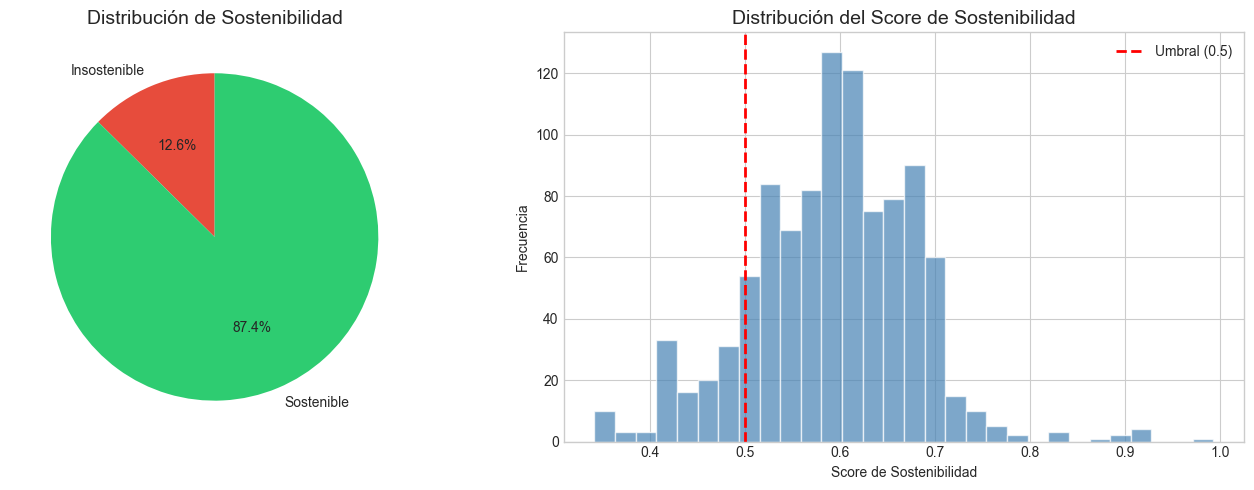

In [6]:
# Distribución de la variable objetivo
print("\nDistribución de Sostenibilidad:")
print(df['Sustainable'].value_counts())
print(f"\nProporción sostenible: {df['Sustainable'].mean():.2%}")

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#e74c3c', '#2ecc71']
labels = ['Insostenible', 'Sostenible']
sizes = df['Sustainable'].value_counts().sort_index()
axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribución de Sostenibilidad', fontsize=14)

# Histograma del score de sostenibilidad
axes[1].hist(df['Sustainability_Score'], bins=30, color='steelblue', edgecolor='white', alpha=0.7)
axes[1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Umbral (0.5)')
axes[1].set_xlabel('Score de Sostenibilidad')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución del Score de Sostenibilidad', fontsize=14)
axes[1].legend()

plt.tight_layout()
plt.show()

## 4. Análisis de Distribuciones

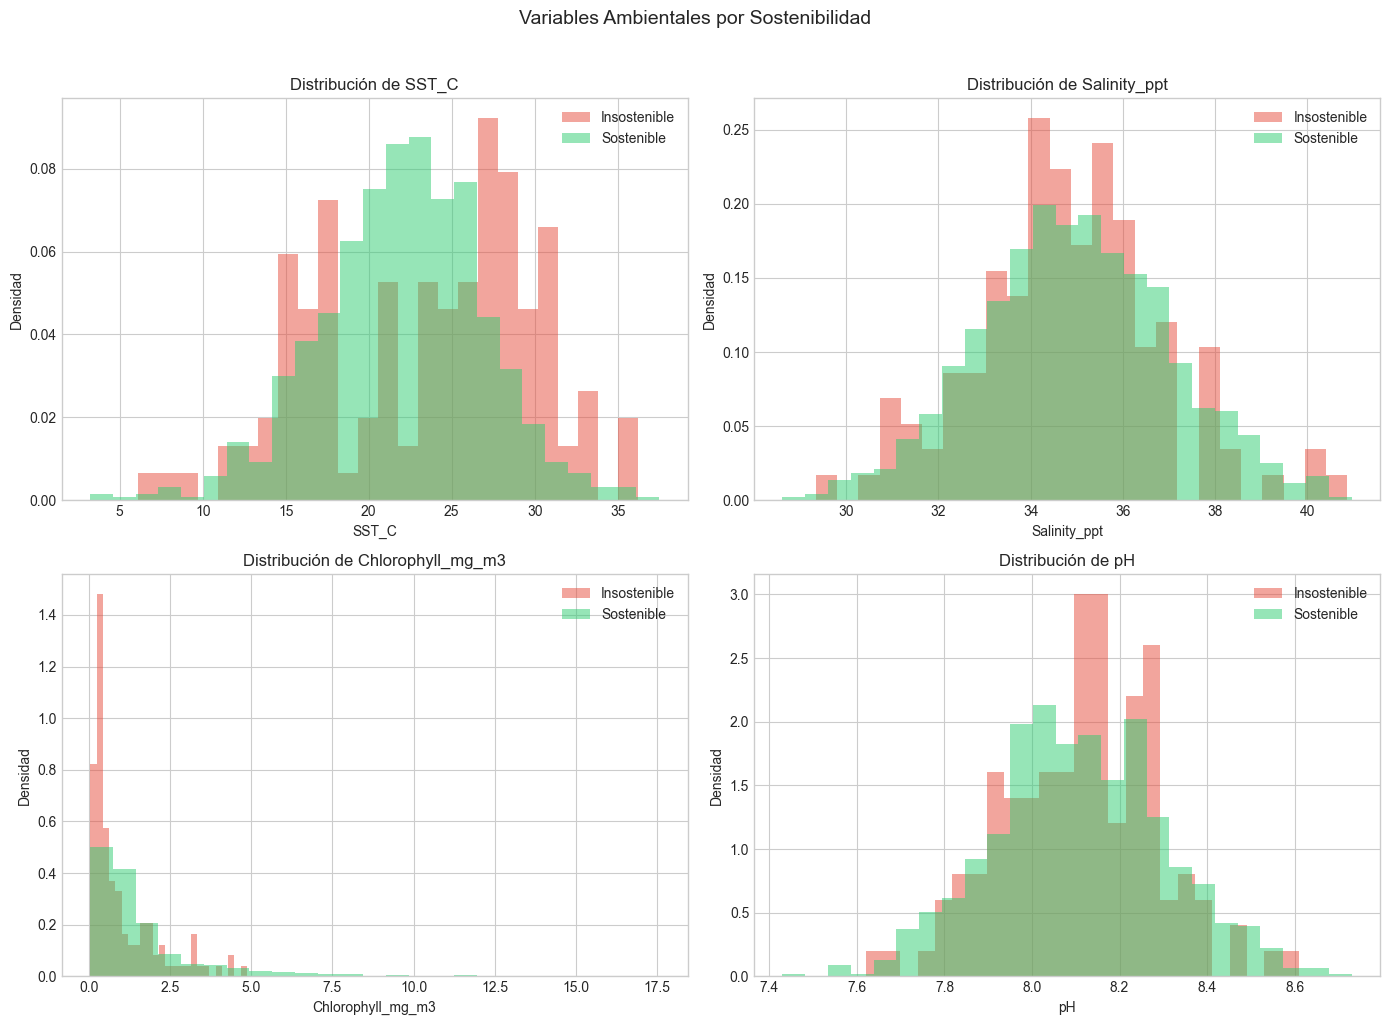

In [7]:
# Variables ambientales
env_vars = ['SST_C', 'Salinity_ppt', 'Chlorophyll_mg_m3', 'pH']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(env_vars):
    # Histograma con KDE separado por sostenibilidad
    for sustainable, color, label in [(0, '#e74c3c', 'Insostenible'), (1, '#2ecc71', 'Sostenible')]:
        subset = df[df['Sustainable'] == sustainable][var]
        axes[i].hist(subset, bins=25, alpha=0.5, color=color, label=label, density=True)
    
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Densidad')
    axes[i].set_title(f'Distribución de {var}', fontsize=12)
    axes[i].legend()

plt.suptitle('Variables Ambientales por Sostenibilidad', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

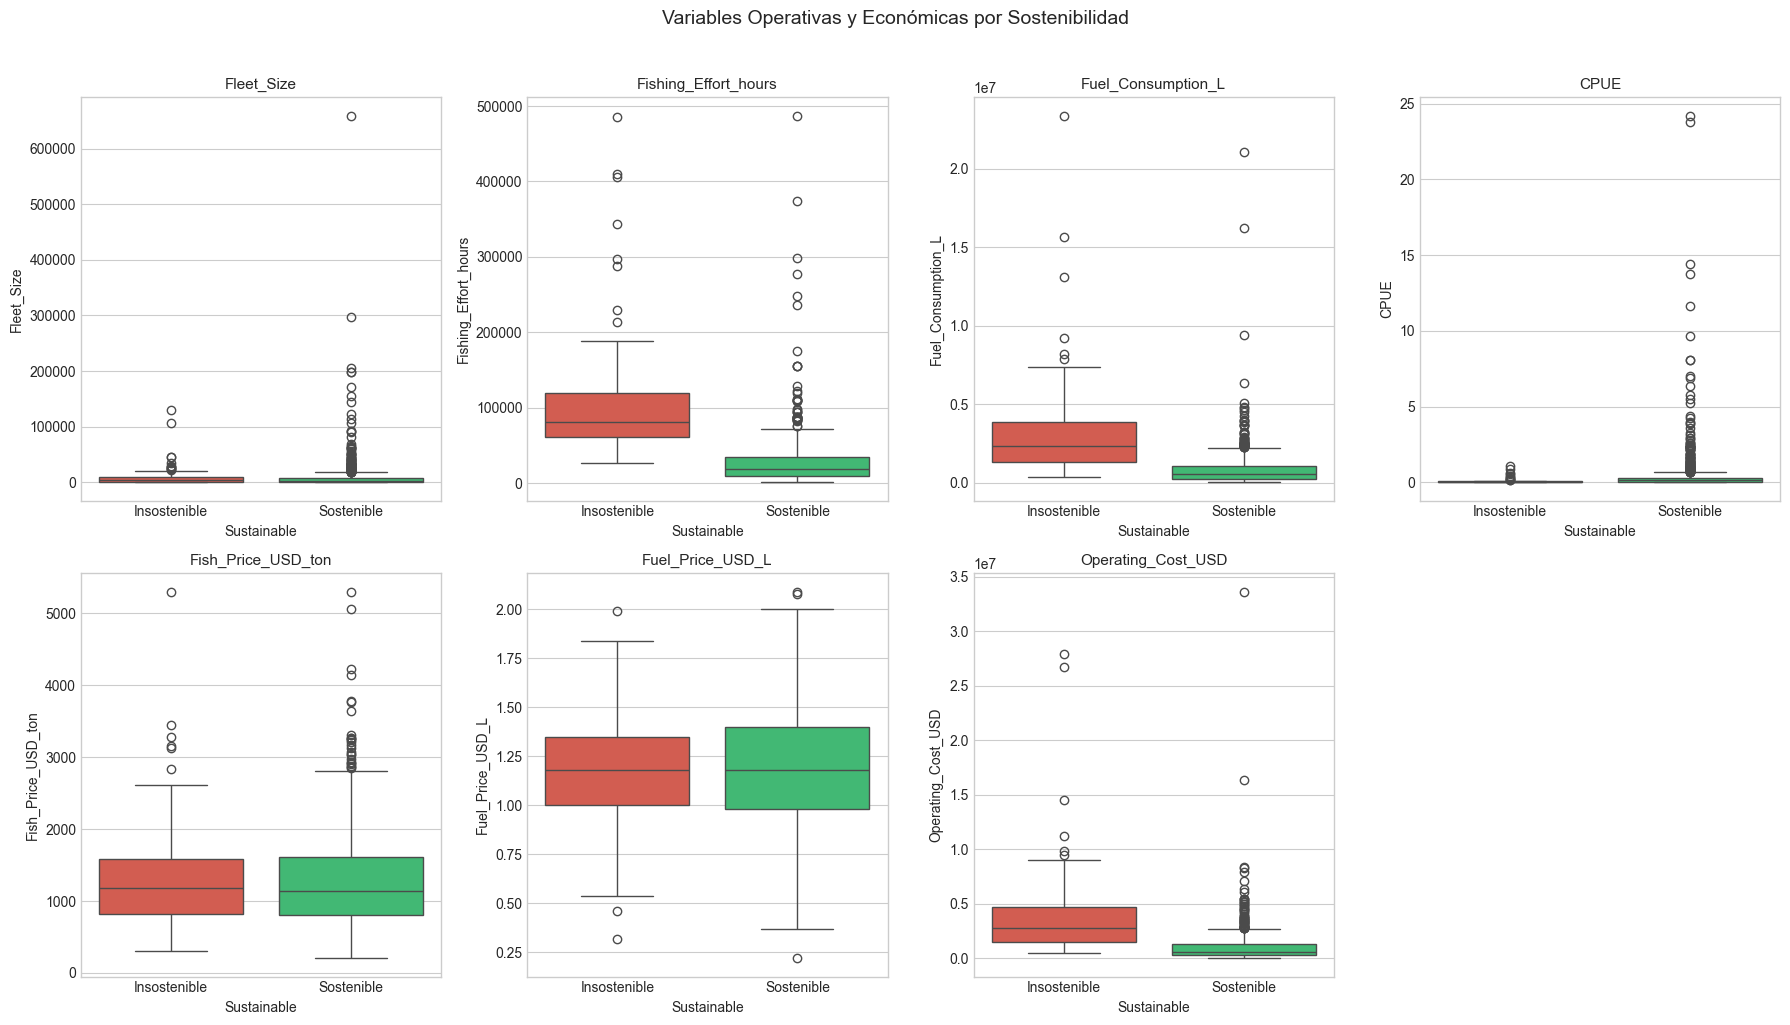

In [8]:
# Variables operativas y económicas
op_vars = ['Fleet_Size', 'Fishing_Effort_hours', 'Fuel_Consumption_L', 'CPUE']
econ_vars = ['Fish_Price_USD_ton', 'Fuel_Price_USD_L', 'Operating_Cost_USD']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

# Variables operativas
for i, var in enumerate(op_vars):
    sns.boxplot(data=df, x='Sustainable', y=var, ax=axes[0, i], palette=['#e74c3c', '#2ecc71'])
    axes[0, i].set_xticklabels(['Insostenible', 'Sostenible'])
    axes[0, i].set_title(f'{var}', fontsize=11)

# Variables económicas
for i, var in enumerate(econ_vars):
    sns.boxplot(data=df, x='Sustainable', y=var, ax=axes[1, i], palette=['#e74c3c', '#2ecc71'])
    axes[1, i].set_xticklabels(['Insostenible', 'Sostenible'])
    axes[1, i].set_title(f'{var}', fontsize=11)

# Ocultar el último subplot vacío
axes[1, 3].axis('off')

plt.suptitle('Variables Operativas y Económicas por Sostenibilidad', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 5. Análisis de Correlaciones

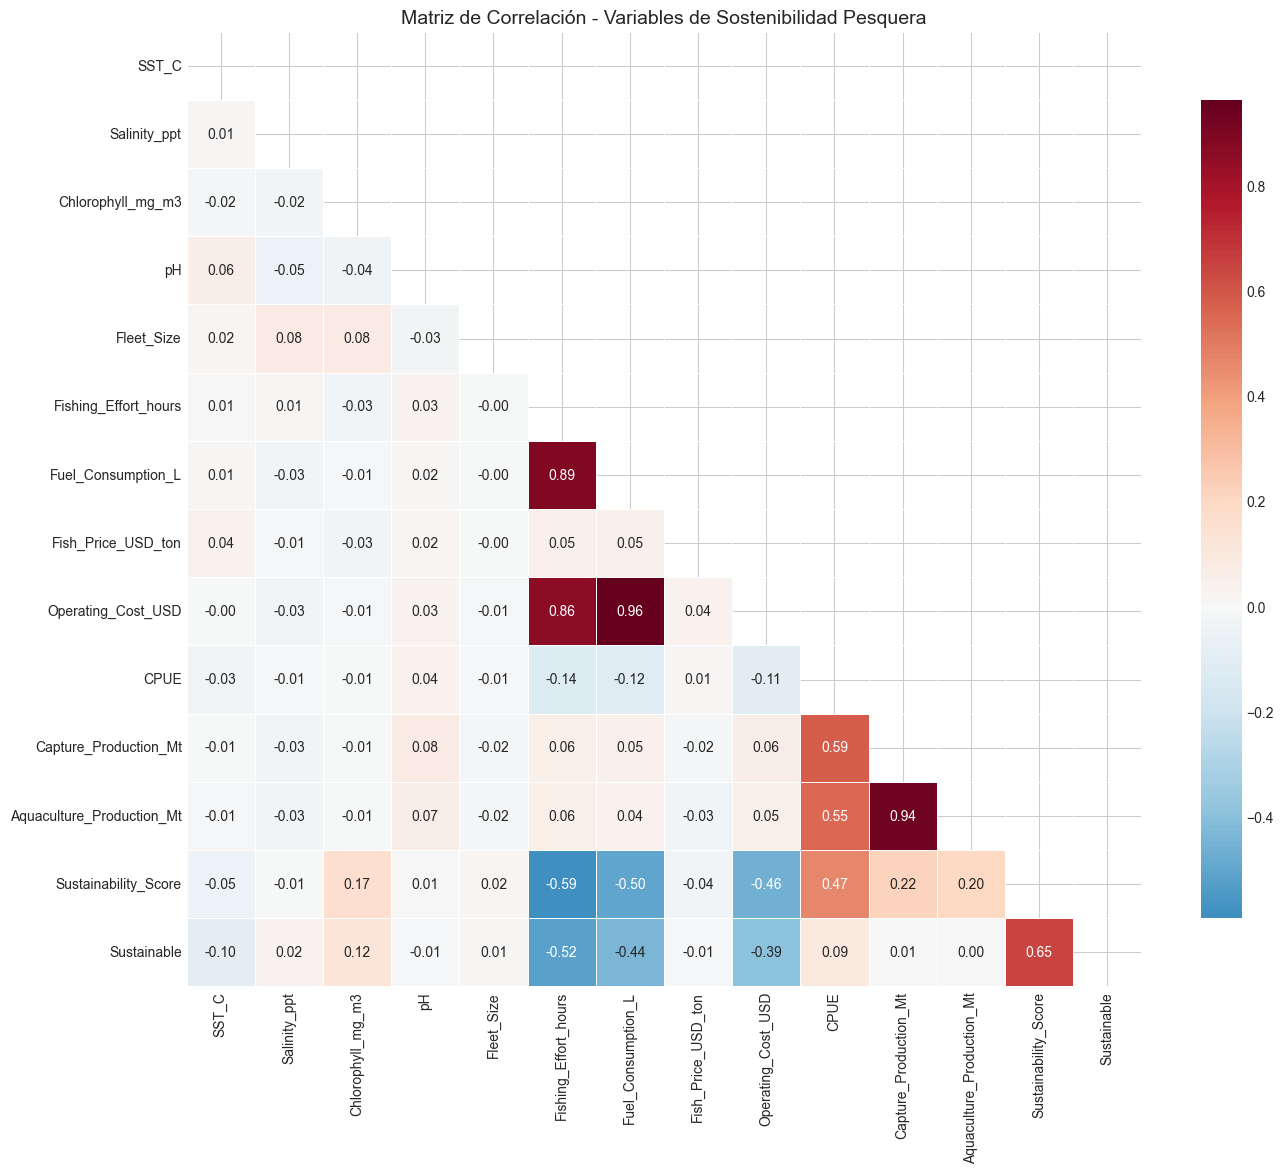

In [9]:
# Matriz de correlación
correlation_vars = [
    'SST_C', 'Salinity_ppt', 'Chlorophyll_mg_m3', 'pH',
    'Fleet_Size', 'Fishing_Effort_hours', 'Fuel_Consumption_L',
    'Fish_Price_USD_ton', 'Operating_Cost_USD', 'CPUE',
    'Capture_Production_Mt', 'Aquaculture_Production_Mt',
    'Sustainability_Score', 'Sustainable'
]

corr_matrix = df[correlation_vars].corr()

# Heatmap
fig, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, ax=ax,
            cbar_kws={'shrink': 0.8})
ax.set_title('Matriz de Correlación - Variables de Sostenibilidad Pesquera', fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
# Top correlaciones con Sostenibilidad
print("\nCorrelaciones con Score de Sostenibilidad:")
print("=" * 50)
correlations = corr_matrix['Sustainability_Score'].drop(['Sustainability_Score', 'Sustainable']).sort_values(key=abs, ascending=False)
for var, corr in correlations.items():
    direction = "positiva" if corr > 0 else "negativa"
    strength = "fuerte" if abs(corr) > 0.5 else "moderada" if abs(corr) > 0.3 else "débil"
    print(f"{var:30}: {corr:+.3f} ({direction}, {strength})")


Correlaciones con Score de Sostenibilidad:
Fishing_Effort_hours          : -0.593 (negativa, fuerte)
Fuel_Consumption_L            : -0.503 (negativa, fuerte)
CPUE                          : +0.468 (positiva, moderada)
Operating_Cost_USD            : -0.463 (negativa, moderada)
Capture_Production_Mt         : +0.217 (positiva, débil)
Aquaculture_Production_Mt     : +0.202 (positiva, débil)
Chlorophyll_mg_m3             : +0.166 (positiva, débil)
SST_C                         : -0.054 (negativa, débil)
Fish_Price_USD_ton            : -0.039 (negativa, débil)
Fleet_Size                    : +0.018 (positiva, débil)
pH                            : +0.007 (positiva, débil)
Salinity_ppt                  : -0.005 (negativa, débil)


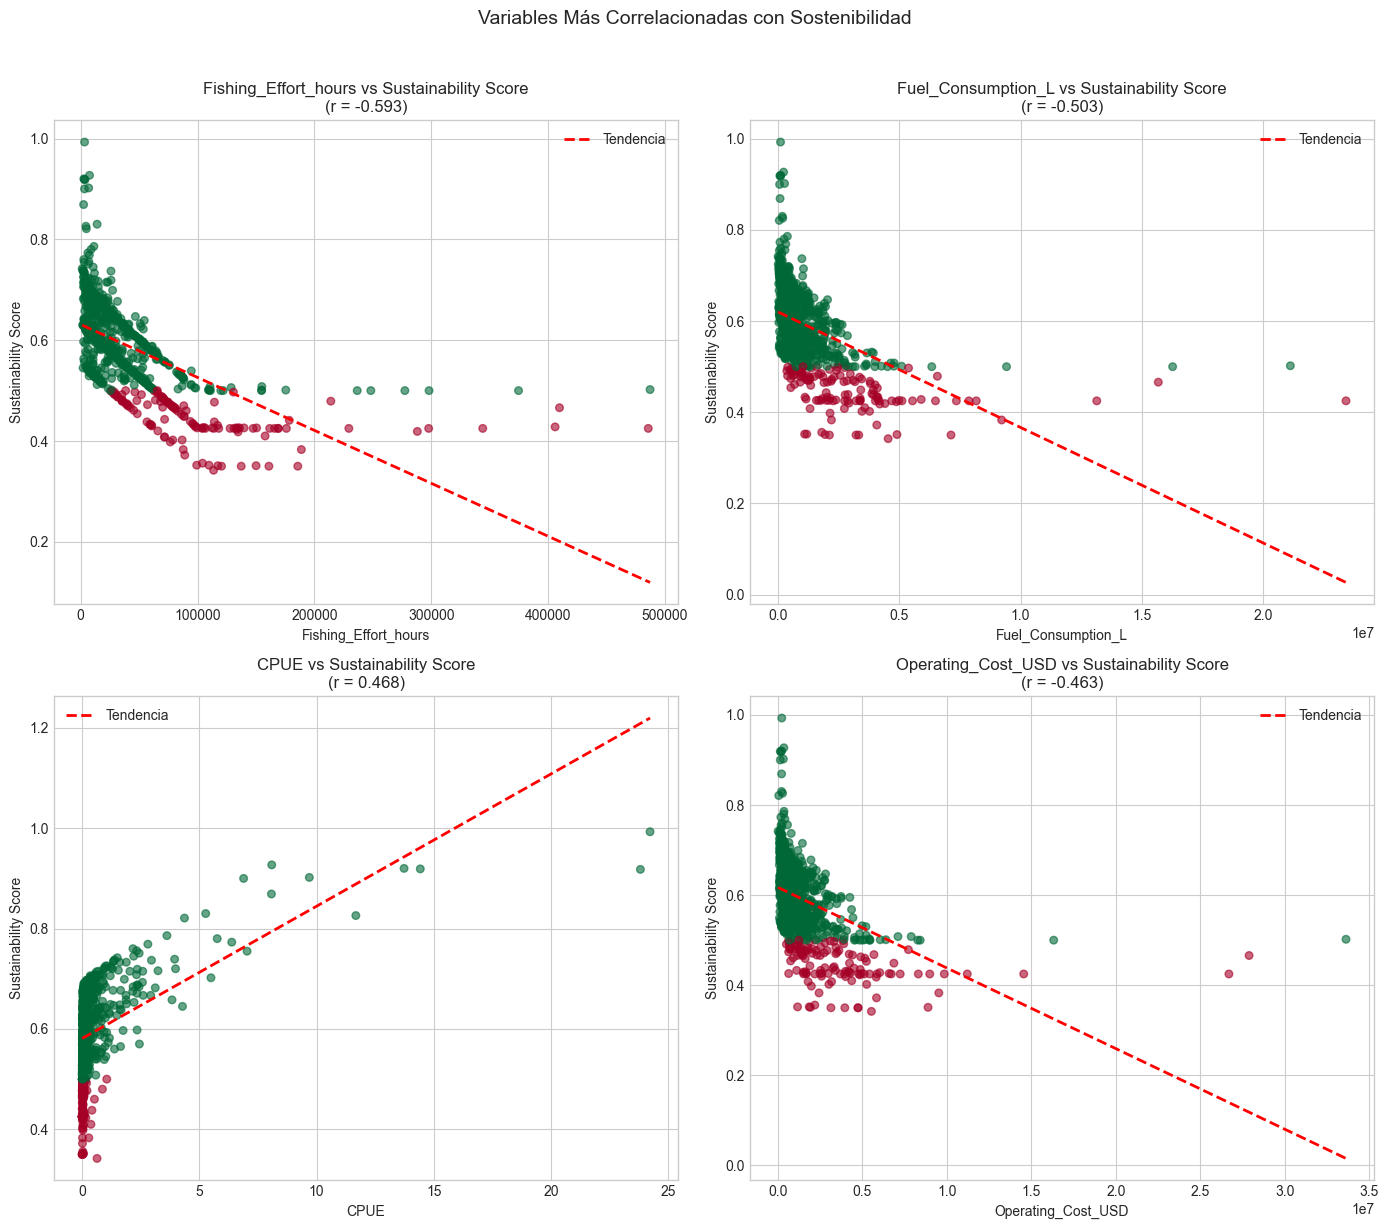

In [11]:
# Scatter plots de variables más correlacionadas
top_corr_vars = correlations.head(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, var in enumerate(top_corr_vars):
    scatter = axes[i].scatter(df[var], df['Sustainability_Score'], 
                               c=df['Sustainable'], cmap='RdYlGn', alpha=0.6, s=30)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Sustainability Score')
    axes[i].set_title(f'{var} vs Sustainability Score\n(r = {correlations[var]:.3f})')
    
    # Línea de tendencia
    z = np.polyfit(df[var], df['Sustainability_Score'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[var].min(), df[var].max(), 100)
    axes[i].plot(x_line, p(x_line), 'r--', linewidth=2, label='Tendencia')
    axes[i].legend()

plt.suptitle('Variables Más Correlacionadas con Sostenibilidad', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 6. Análisis Temporal

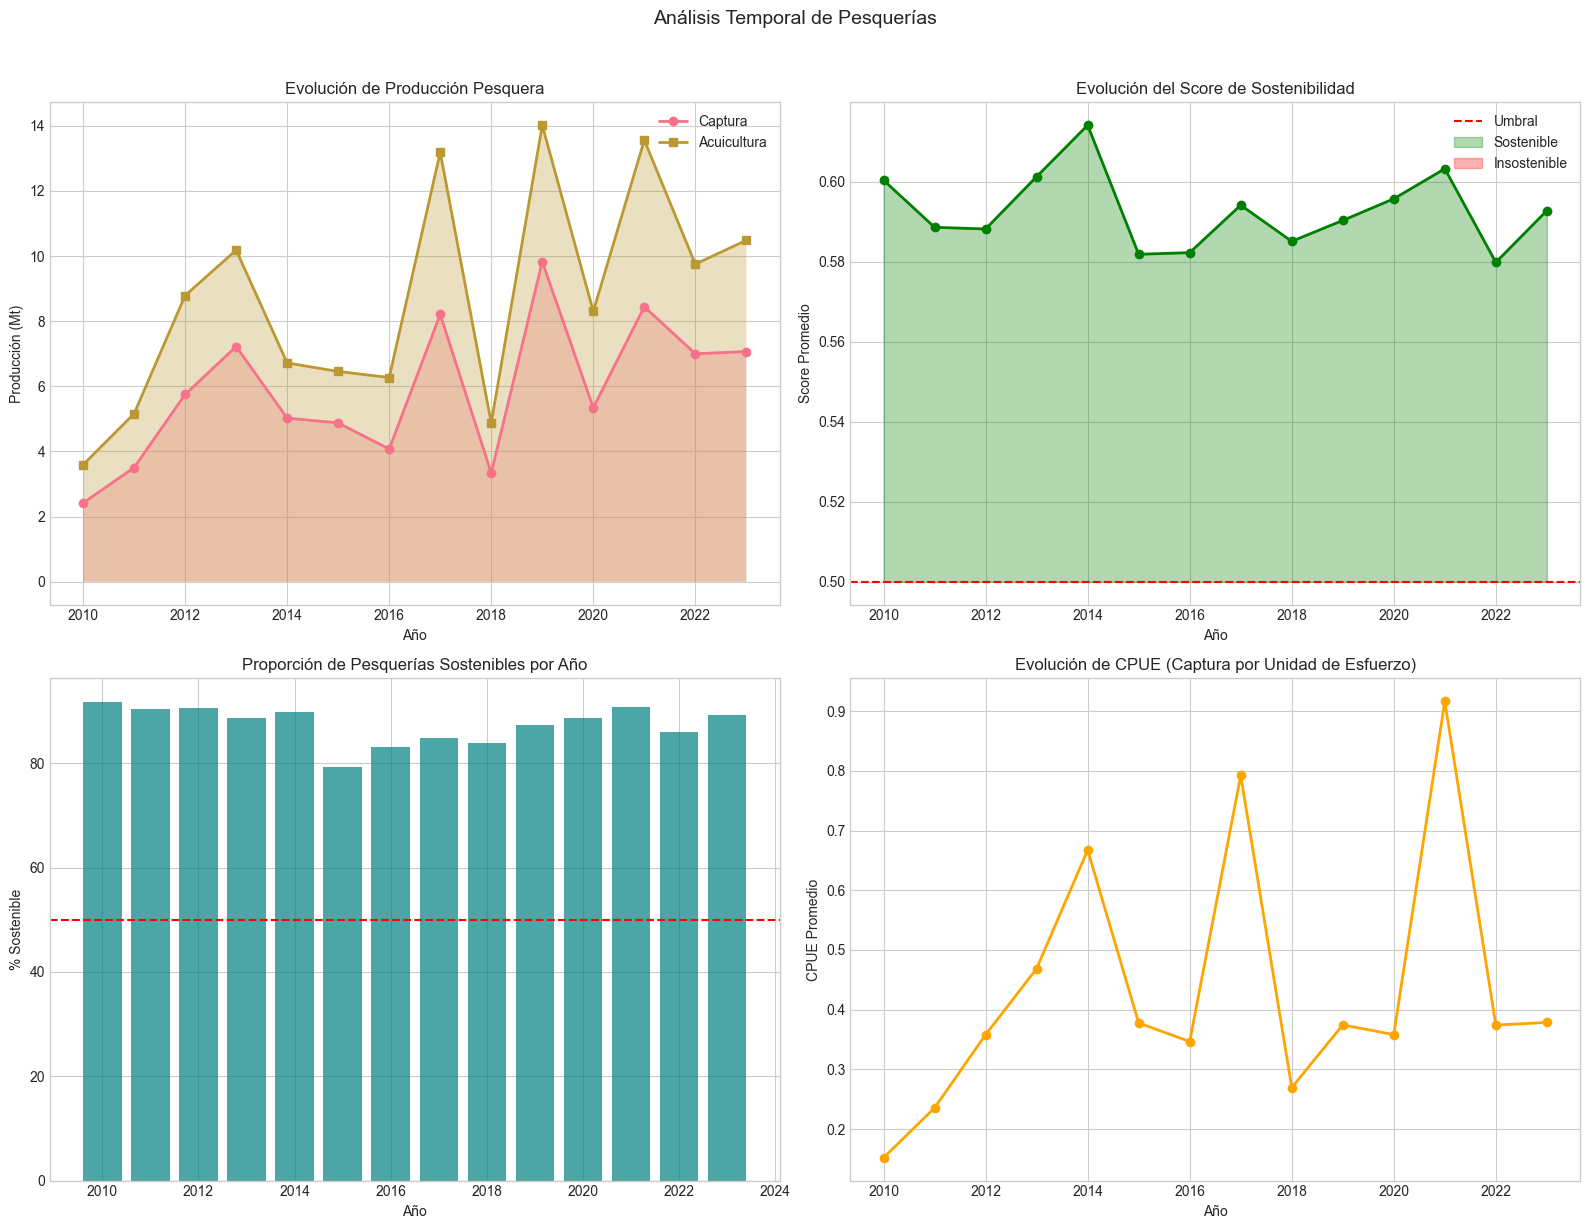

In [12]:
# Tendencias temporales
yearly_stats = df.groupby('Year').agg({
    'Capture_Production_Mt': 'mean',
    'Aquaculture_Production_Mt': 'mean',
    'Total_Production_Mt': 'mean',
    'Sustainability_Score': 'mean',
    'Sustainable': 'mean',
    'CPUE': 'mean',
    'Fishing_Effort_hours': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Producción por tipo
axes[0, 0].plot(yearly_stats['Year'], yearly_stats['Capture_Production_Mt'], 
                marker='o', label='Captura', linewidth=2)
axes[0, 0].plot(yearly_stats['Year'], yearly_stats['Aquaculture_Production_Mt'], 
                marker='s', label='Acuicultura', linewidth=2)
axes[0, 0].fill_between(yearly_stats['Year'], yearly_stats['Capture_Production_Mt'], alpha=0.3)
axes[0, 0].fill_between(yearly_stats['Year'], yearly_stats['Aquaculture_Production_Mt'], alpha=0.3)
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Producción (Mt)')
axes[0, 0].set_title('Evolución de Producción Pesquera', fontsize=12)
axes[0, 0].legend()

# Score de sostenibilidad
axes[0, 1].plot(yearly_stats['Year'], yearly_stats['Sustainability_Score'], 
                marker='o', color='green', linewidth=2)
axes[0, 1].axhline(y=0.5, color='red', linestyle='--', label='Umbral')
axes[0, 1].fill_between(yearly_stats['Year'], yearly_stats['Sustainability_Score'], 0.5, 
                        where=yearly_stats['Sustainability_Score'] >= 0.5, 
                        color='green', alpha=0.3, label='Sostenible')
axes[0, 1].fill_between(yearly_stats['Year'], yearly_stats['Sustainability_Score'], 0.5, 
                        where=yearly_stats['Sustainability_Score'] < 0.5, 
                        color='red', alpha=0.3, label='Insostenible')
axes[0, 1].set_xlabel('Año')
axes[0, 1].set_ylabel('Score Promedio')
axes[0, 1].set_title('Evolución del Score de Sostenibilidad', fontsize=12)
axes[0, 1].legend()

# Proporción sostenible
axes[1, 0].bar(yearly_stats['Year'], yearly_stats['Sustainable'] * 100, 
               color='teal', alpha=0.7)
axes[1, 0].axhline(y=50, color='red', linestyle='--', label='50%')
axes[1, 0].set_xlabel('Año')
axes[1, 0].set_ylabel('% Sostenible')
axes[1, 0].set_title('Proporción de Pesquerías Sostenibles por Año', fontsize=12)

# CPUE temporal
axes[1, 1].plot(yearly_stats['Year'], yearly_stats['CPUE'], 
                marker='o', color='orange', linewidth=2)
axes[1, 1].set_xlabel('Año')
axes[1, 1].set_ylabel('CPUE Promedio')
axes[1, 1].set_title('Evolución de CPUE (Captura por Unidad de Esfuerzo)', fontsize=12)

plt.suptitle('Análisis Temporal de Pesquerías', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 7. Análisis Geográfico (por País)

In [13]:
# Estadísticas por país
country_stats = df.groupby('Country').agg({
    'Total_Production_Mt': 'sum',
    'Sustainability_Score': 'mean',
    'Sustainable': 'mean',
    'CPUE': 'mean',
    'Fleet_Size': 'mean',
    'Country': 'count'
}).rename(columns={'Country': 'n_records'})

country_stats = country_stats.sort_values('Total_Production_Mt', ascending=False)

print("\nEstadísticas por País (Top 10 productores):")
print(country_stats.head(10).round(3))


Estadísticas por País (Top 10 productores):
           Total_Production_Mt  Sustainability_Score  Sustainable   CPUE  \
Country                                                                    
China                 6485.134                 0.656        0.830  4.006   
Indonesia             2267.294                 0.638        0.962  1.503   
India                 1167.857                 0.611        0.909  0.795   
Vietnam                592.658                 0.598        0.829  0.326   
Peru                   568.475                 0.575        0.818  0.312   
USA                    529.029                 0.576        0.789  0.249   
Chile                  407.803                 0.588        0.839  0.182   
Russia                 403.097                 0.604        0.958  0.316   
Japan                  328.994                 0.584        0.891  0.216   
Mexico                 221.004                 0.592        0.924  0.092   

           Fleet_Size  n_records  
Country

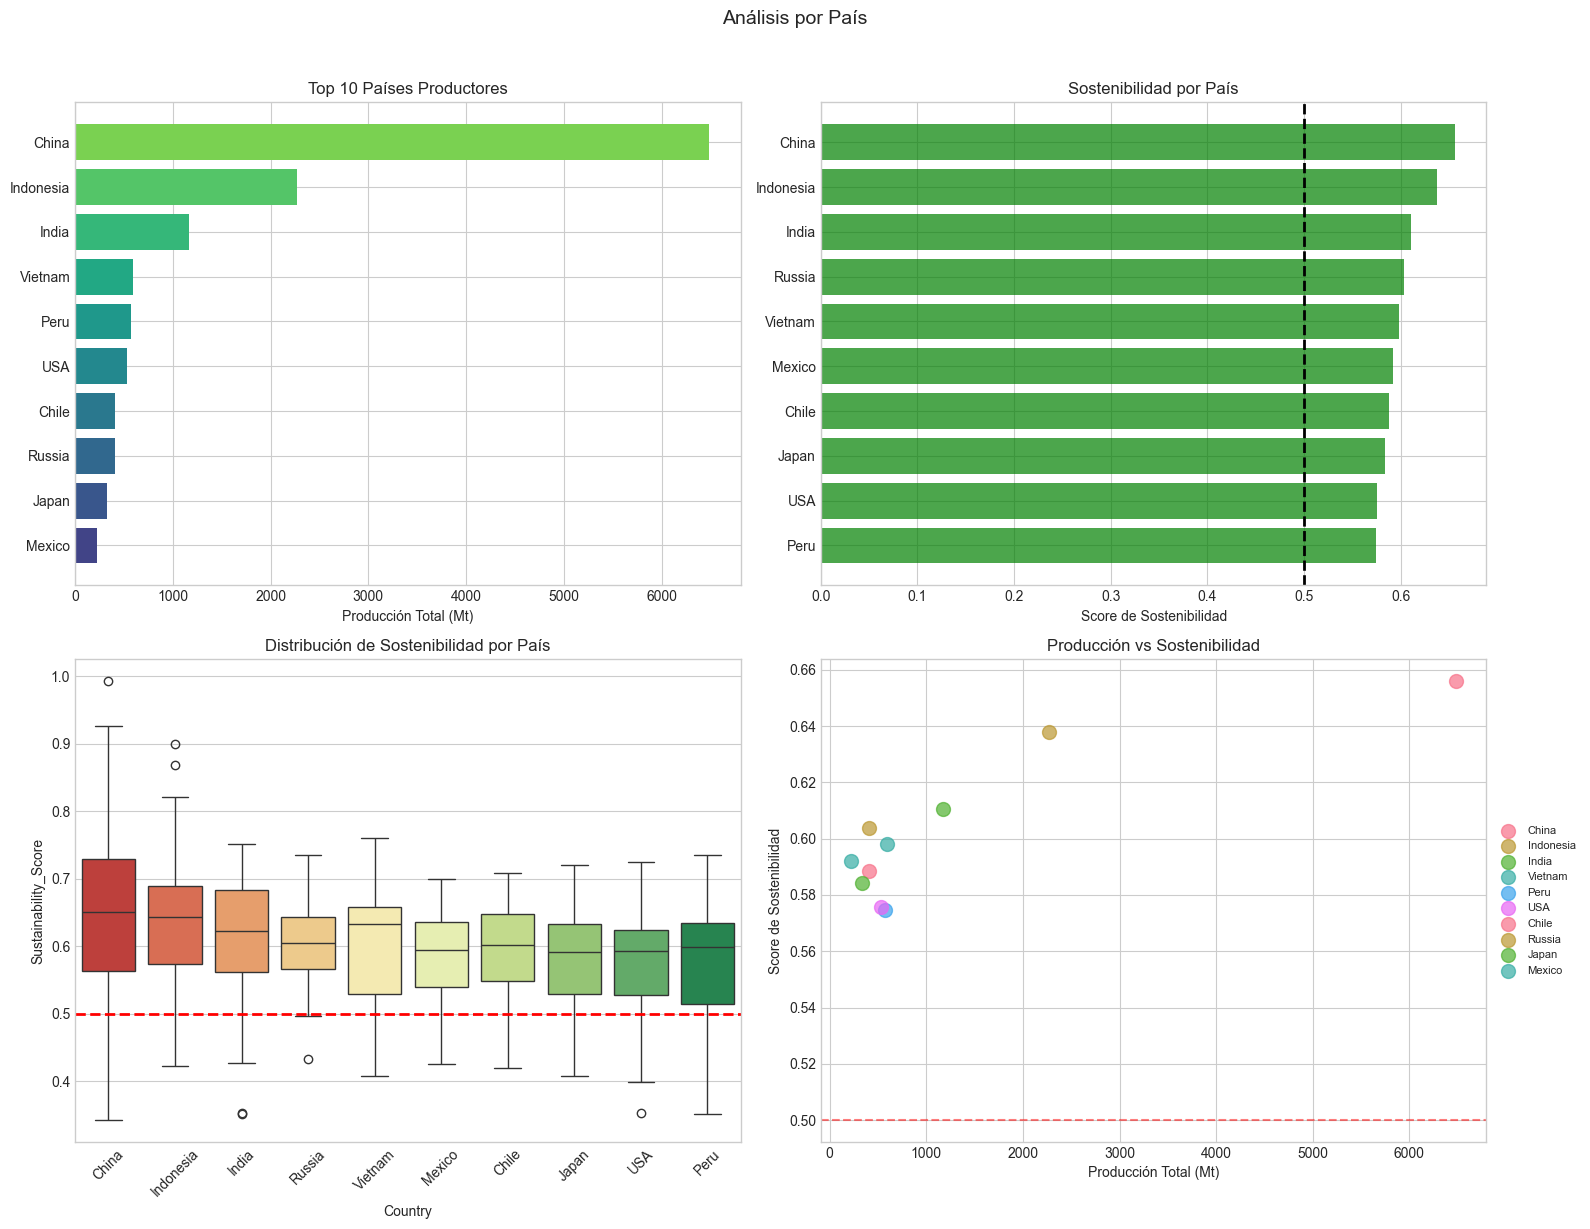

In [14]:
# Visualización por país
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_countries = country_stats.head(10).index.tolist()
df_top = df[df['Country'].isin(top_countries)]

# Producción total por país
prod_by_country = country_stats.head(10)['Total_Production_Mt'].sort_values()
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(prod_by_country)))
axes[0, 0].barh(prod_by_country.index, prod_by_country.values, color=colors)
axes[0, 0].set_xlabel('Producción Total (Mt)')
axes[0, 0].set_title('Top 10 Países Productores', fontsize=12)

# Score de sostenibilidad por país
sust_by_country = country_stats.loc[top_countries, 'Sustainability_Score'].sort_values()
colors = ['green' if x >= 0.5 else 'red' for x in sust_by_country.values]
axes[0, 1].barh(sust_by_country.index, sust_by_country.values, color=colors, alpha=0.7)
axes[0, 1].axvline(x=0.5, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Score de Sostenibilidad')
axes[0, 1].set_title('Sostenibilidad por País', fontsize=12)

# Boxplot de sostenibilidad por país
order = country_stats.loc[top_countries, 'Sustainability_Score'].sort_values(ascending=False).index
sns.boxplot(data=df_top, x='Country', y='Sustainability_Score', order=order, ax=axes[1, 0], palette='RdYlGn')
axes[1, 0].axhline(y=0.5, color='red', linestyle='--', linewidth=2)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_title('Distribución de Sostenibilidad por País', fontsize=12)

# Producción vs Sostenibilidad (scatter)
for country in top_countries:
    subset = country_stats.loc[country]
    axes[1, 1].scatter(subset['Total_Production_Mt'], subset['Sustainability_Score'], 
                        s=100, label=country, alpha=0.7)
axes[1, 1].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
axes[1, 1].set_xlabel('Producción Total (Mt)')
axes[1, 1].set_ylabel('Score de Sostenibilidad')
axes[1, 1].set_title('Producción vs Sostenibilidad', fontsize=12)
axes[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.suptitle('Análisis por País', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 8. Análisis de Outliers y Valores Extremos

In [15]:
# Detección de outliers usando IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = {
            'n_outliers': len(outliers),
            'pct_outliers': len(outliers) / len(df) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    return pd.DataFrame(outlier_info).T

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['Year', 'Sustainable']]

outlier_analysis = detect_outliers_iqr(df, numeric_cols)
print("\nAnálisis de Outliers (IQR):")
print(outlier_analysis.round(2))


Análisis de Outliers (IQR):
                           n_outliers  pct_outliers  lower_bound  upper_bound
SST_C                            13.0           1.3         8.51        36.02
Salinity_ppt                      6.0           0.6        29.48        40.41
Chlorophyll_mg_m3                95.0           9.5        -1.46         3.83
pH                                9.0           0.9         7.59         8.63
Fleet_Size                      110.0          11.0     -9844.88     19000.12
Fishing_Effort_hours             77.0           7.7    -38286.75     92793.25
Fuel_Consumption_L               81.0           8.1  -1221388.12   2772872.88
Fish_Price_USD_ton               32.0           3.2      -402.14      2803.43
Fuel_Price_USD_L                  4.0           0.4         0.37         2.00
Operating_Cost_USD               84.0           8.4  -1526260.62   3481320.38
Capture_Production_Mt           119.0          11.9        -3.73         9.08
Aquaculture_Production_Mt       128

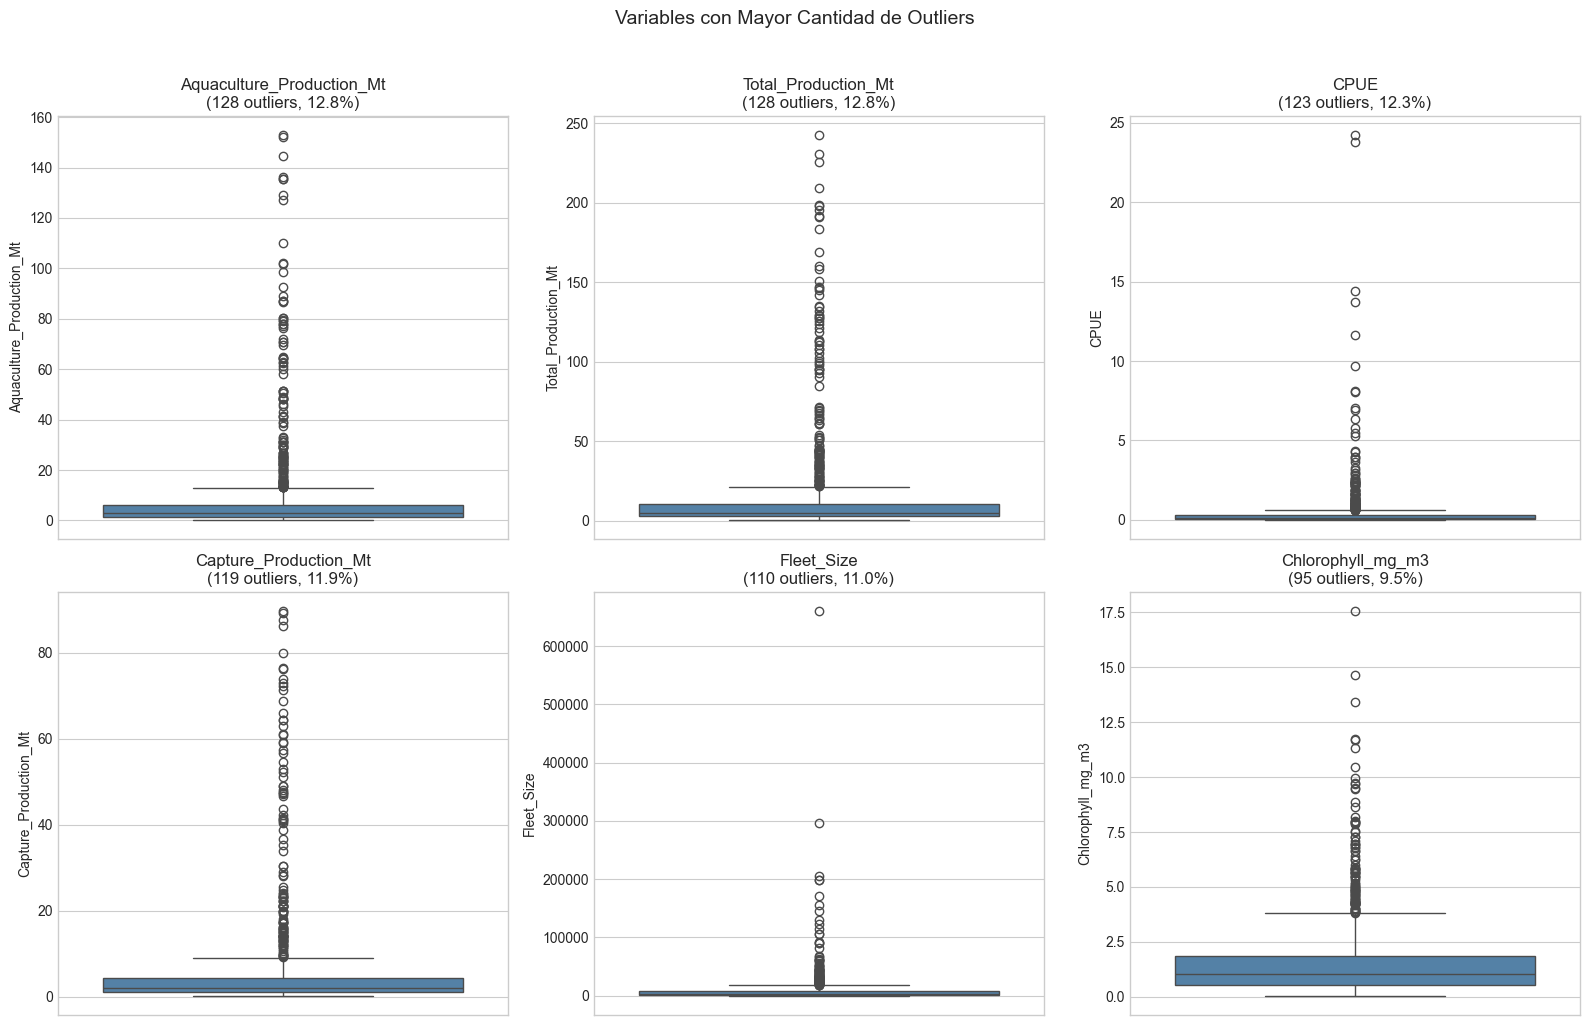

In [16]:
# Visualización de outliers
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

vars_with_outliers = outlier_analysis[outlier_analysis['n_outliers'] > 0].nlargest(6, 'n_outliers').index

for i, var in enumerate(vars_with_outliers):
    sns.boxplot(data=df, y=var, ax=axes[i], color='steelblue')
    axes[i].set_title(f'{var}\n({int(outlier_analysis.loc[var, "n_outliers"])} outliers, {outlier_analysis.loc[var, "pct_outliers"]:.1f}%)')

plt.suptitle('Variables con Mayor Cantidad de Outliers', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 9. Preparación para Redes Bayesianas

In [17]:
# Discretización de variables para red bayesiana
features_for_bn = [
    'SST_C', 'Salinity_ppt', 'Chlorophyll_mg_m3', 'pH',
    'Fleet_Size', 'Fishing_Effort_hours', 'Fuel_Consumption_L',
    'Fish_Price_USD_ton', 'Operating_Cost_USD', 'CPUE'
]

df_bayesian = prepare_bayesian_dataset(
    df, 
    target='Sustainable',
    features=features_for_bn,
    discretize=True
)

print("Dataset preparado para Red Bayesiana:")
print(f"Dimensiones: {df_bayesian.shape}")
print(f"\nColumnas: {list(df_bayesian.columns)}")
df_bayesian.head(10)

Dataset preparado para Red Bayesiana:
Dimensiones: (1000, 11)

Columnas: ['SST_C_disc', 'Salinity_ppt_disc', 'Chlorophyll_mg_m3_disc', 'pH_disc', 'Fleet_Size_disc', 'Fishing_Effort_hours_disc', 'Fuel_Consumption_L_disc', 'Fish_Price_USD_ton_disc', 'Operating_Cost_USD_disc', 'CPUE_disc', 'Sustainable']


,SST_C_disc,Salinity_ppt_disc,Chlorophyll_mg_m3_disc,pH_disc,Fleet_Size_disc,Fishing_Effort_hours_disc,Fuel_Consumption_L_disc,Fish_Price_USD_ton_disc,Operating_Cost_USD_disc,CPUE_disc,Sustainable
0,Alto,Alto,Medio,Medio,Alto,Alto,Medio,Bajo,Medio,Medio,1
1,Bajo,Medio,Bajo,Bajo,Bajo,Bajo,Bajo,Alto,Bajo,Medio,1
2,Bajo,Medio,Bajo,Alto,Medio,Bajo,Bajo,Medio,Bajo,Alto,1
3,Alto,Alto,Medio,Bajo,Alto,Alto,Alto,Alto,Alto,Bajo,1
4,Bajo,Bajo,Alto,Bajo,Alto,Alto,Alto,Alto,Alto,Bajo,0
5,Alto,Alto,Bajo,Medio,Medio,Medio,Medio,Alto,Medio,Medio,0
6,Alto,Medio,Bajo,Bajo,Bajo,Alto,Medio,Bajo,Medio,Medio,0
7,Medio,Alto,Medio,Alto,Bajo,Bajo,Bajo,Bajo,Medio,Medio,1
8,Medio,Bajo,Bajo,Bajo,Medio,Medio,Medio,Medio,Medio,Medio,1
9,Bajo,Alto,Bajo,Alto,Bajo,Alto,Medio,Alto,Medio,Medio,0


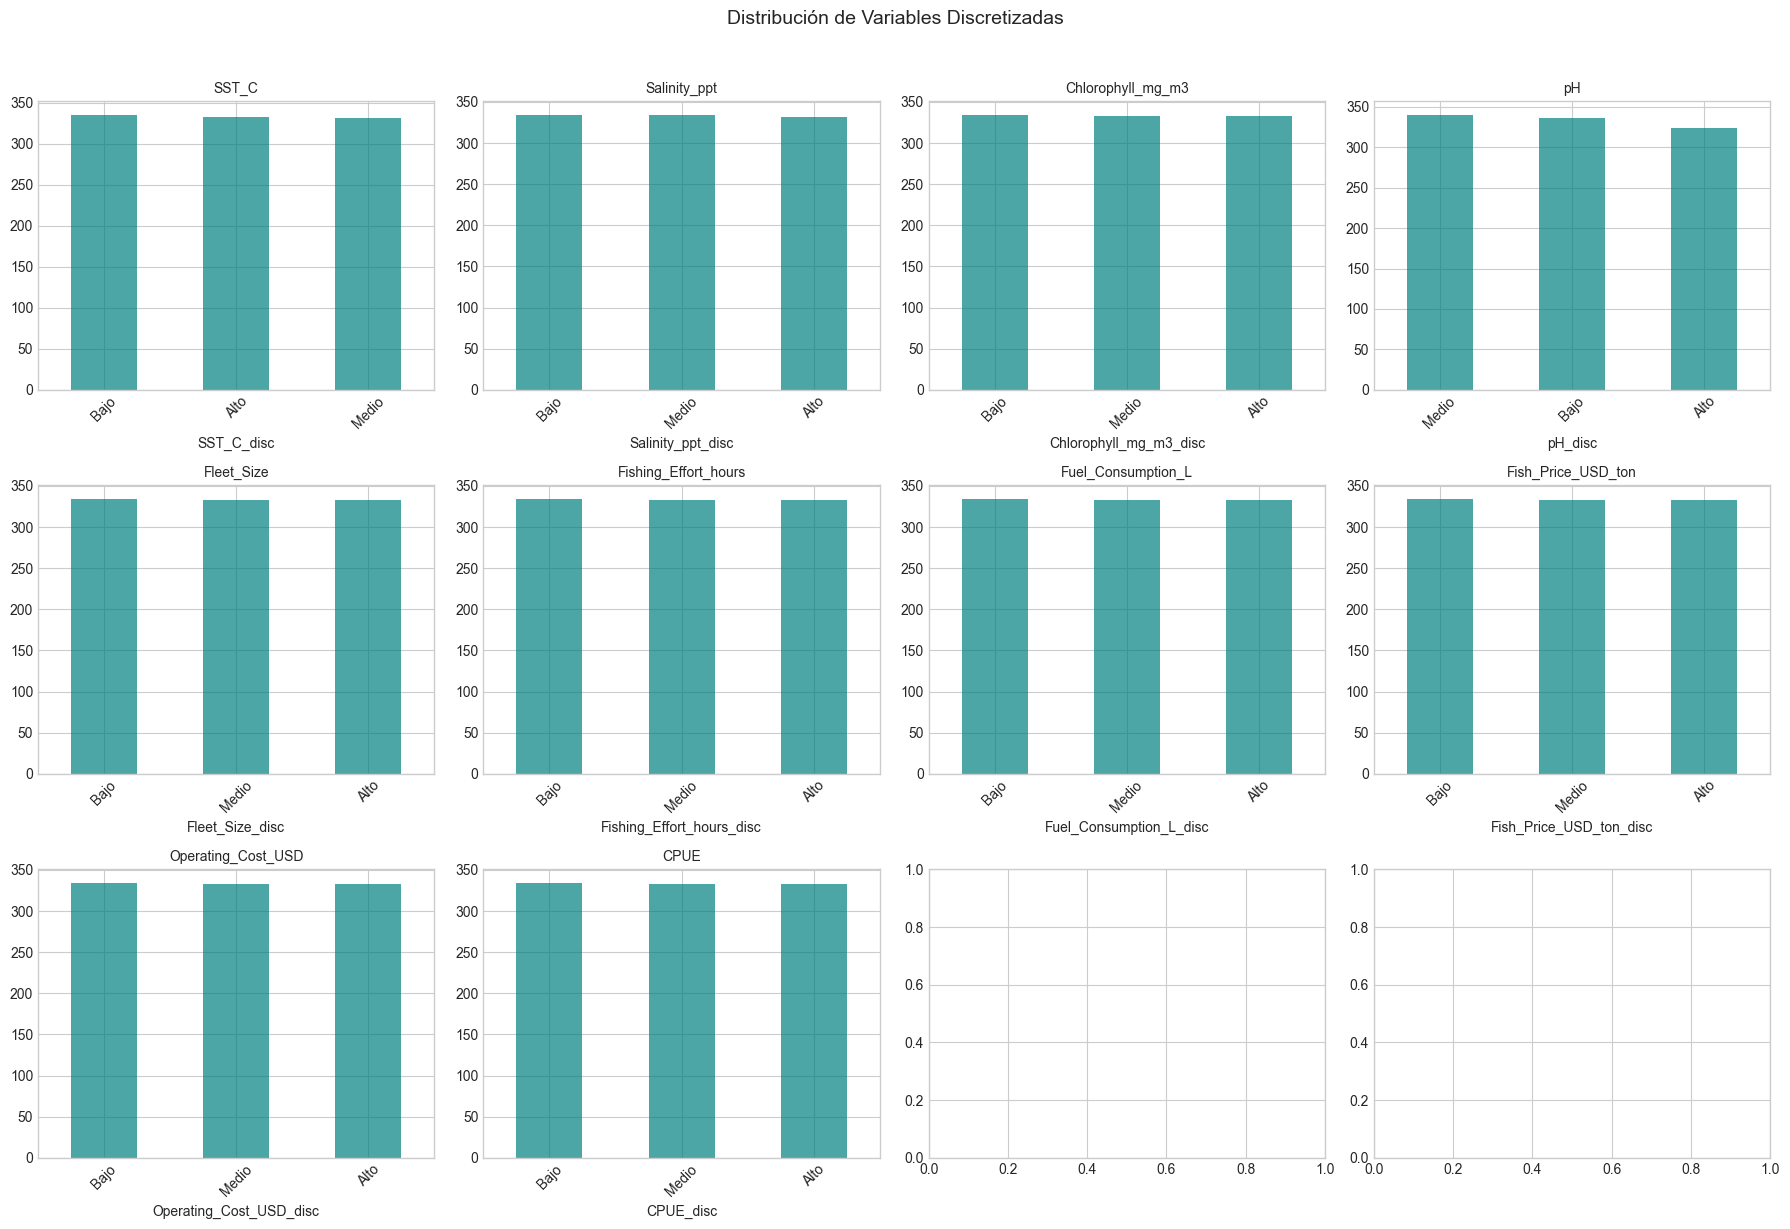

In [18]:
# Distribución de categorías discretizadas
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

disc_cols = [c for c in df_bayesian.columns if c.endswith('_disc')]

for i, col in enumerate(disc_cols[:12]):
    df_bayesian[col].value_counts().plot(kind='bar', ax=axes[i], color='teal', alpha=0.7)
    axes[i].set_title(col.replace('_disc', ''), fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Distribución de Variables Discretizadas', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [19]:
# Guardar dataset preparado para bayesian
df_bayesian.to_csv(PROCESSED_DIR / 'fisheries_bayesian.csv', index=False)
print(f"\nDataset bayesiano guardado en: {PROCESSED_DIR / 'fisheries_bayesian.csv'}")


Dataset bayesiano guardado en: c:\Proyectos\Pesquerias\DL_Bayesian\data\processed\fisheries_bayesian.csv


## 10. Resumen del EDA

In [20]:
print("=" * 80)
print("RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS")
print("=" * 80)

print(f"""
1. DATASET
   - Total de registros: {len(df)}
   - Período: {df['Year'].min()} - {df['Year'].max()}
   - Países: {df['Country'].nunique()}
   - Variables: {len(df.columns)}

2. VARIABLE OBJETIVO (Sostenibilidad)
   - Sostenibles: {df['Sustainable'].sum()} ({df['Sustainable'].mean():.1%})
   - Insostenibles: {len(df) - df['Sustainable'].sum()} ({1 - df['Sustainable'].mean():.1%})
   - Score promedio: {df['Sustainability_Score'].mean():.3f}

3. CORRELACIONES PRINCIPALES CON SOSTENIBILIDAD
   - {correlations.index[0]}: {correlations.iloc[0]:+.3f}
   - {correlations.index[1]}: {correlations.iloc[1]:+.3f}
   - {correlations.index[2]}: {correlations.iloc[2]:+.3f}

4. PAÍSES MÁS PRODUCTORES
   - {country_stats.index[0]}: {country_stats.iloc[0]['Total_Production_Mt']:.2f} Mt
   - {country_stats.index[1]}: {country_stats.iloc[1]['Total_Production_Mt']:.2f} Mt
   - {country_stats.index[2]}: {country_stats.iloc[2]['Total_Production_Mt']:.2f} Mt

5. CALIDAD DE DATOS
   - Valores faltantes: {df.isnull().sum().sum()}
   - Outliers significativos: {int(outlier_analysis['n_outliers'].sum())}

6. ARCHIVOS GENERADOS
   - {PROCESSED_DIR / 'fisheries_data.csv'}
   - {PROCESSED_DIR / 'fisheries_bayesian.csv'}
""")

print("=" * 80)
print("FASE B: EDA COMPLETADO")
print("=" * 80)

RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS

1. DATASET
   - Total de registros: 1000
   - Período: 2010 - 2023
   - Países: 20
   - Variables: 18

2. VARIABLE OBJETIVO (Sostenibilidad)
   - Sostenibles: 874 (87.4%)
   - Insostenibles: 126 (12.6%)
   - Score promedio: 0.592

3. CORRELACIONES PRINCIPALES CON SOSTENIBILIDAD
   - Fishing_Effort_hours: -0.593
   - Fuel_Consumption_L: -0.503
   - CPUE: +0.468

4. PAÍSES MÁS PRODUCTORES
   - China: 6485.13 Mt
   - Indonesia: 2267.29 Mt
   - India: 1167.86 Mt

5. CALIDAD DE DATOS
   - Valores faltantes: 0
   - Outliers significativos: 1029

6. ARCHIVOS GENERADOS
   - c:\Proyectos\Pesquerias\DL_Bayesian\data\processed\fisheries_data.csv
   - c:\Proyectos\Pesquerias\DL_Bayesian\data\processed\fisheries_bayesian.csv

FASE B: EDA COMPLETADO
